#Conceptualized, organized and prepared by: Christopher Monterola

## Example 2:  College Exam Prediction

  
Given here are actual class performance of students who took the UP College Admission Test (UPCAT) of a school based in Metro Manila. Information contains the grades of each of the students in English, Math, Science together with their general weighted averages from grades 7-9. An IQ test conducted by the school is also made available together with a confidentially measured variable abbreviated as SA.  

Explore how accurate can k-NN, Logistic regression and Linear Support Vector Machine can forecast UPCAT passers (pass=1, fail=0). Determine the optimal parameter for each method and the top predictors. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
#warnings.filterwarnings("ignore", category=DataConversionWarning)

#from warnings import simplefilter
#from sklearn.exceptions import ConvergenceWarning
#simplefilter("ignore", category=ConvergenceWarning)


In [2]:
df_UPCAT = pd.read_excel('aimpl.xlsx')
dummy = df_UPCAT
dummy.head()

,TEAM,MATCH WR,T.RKNGS A,TEAM PTS,T.RKNGS B,TEAM AVE KDA,T.RKNGS C,TEAM AVE GPM,T.RKNGS C2,AURA,...,OMG,EXE,LPE,KILLS,DEATHS,ASSISTS,KDA,S.RKNGS A,GPM,S.RKNGS B
0,BLCK,0.909091,1.0,27,1.0,5.106,1,618.0,1,2.0,...,2.0,2.0,2.0,39,46,239,6.04,2.0,512,38.0
1,BLCK,0.909091,1.0,27,1.0,5.106,1,618.0,1,2.0,...,2.0,2.0,2.0,99,42,152,5.98,3.0,665,11.0
2,BLCK,0.909091,1.0,27,1.0,5.106,1,618.0,1,2.0,...,2.0,2.0,2.0,129,46,143,5.91,4.0,759,2.0
3,BLCK,0.909091,1.0,27,1.0,5.106,1,618.0,1,2.0,...,2.0,2.0,2.0,102,48,104,4.29,9.0,660,13.5
4,BLCK,0.909091,1.0,27,1.0,5.106,1,618.0,1,2.0,...,2.0,2.0,2.0,21,83,254,3.31,22.0,494,41.5


In [3]:
print(df_UPCAT.shape)

(55, 26)


In [5]:
df_UPCAT.columns

Index(['TEAM', 'MATCH WR', 'T.RKNGS A', 'TEAM PTS', 'T.RKNGS B',
       'TEAM AVE KDA', 'T.RKNGS C', 'TEAM AVE GPM', 'T.RKNGS C2', 'AURA',
       'WORK', 'BREN', 'ONIC', 'CIG', 'BLCK', 'NXP', 'OMG', 'EXE', 'LPE',
       'KILLS', 'DEATHS', 'ASSISTS', 'KDA', 'S.RKNGS A', 'GPM', 'S.RKNGS B'],
      dtype='object')

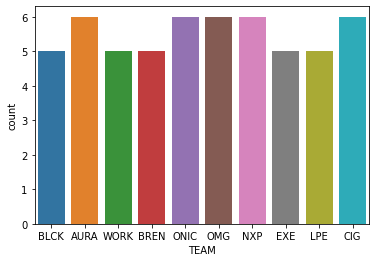

In [6]:
import seaborn as sns
sns.countplot(df_UPCAT['TEAM'],label="Count")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  wa

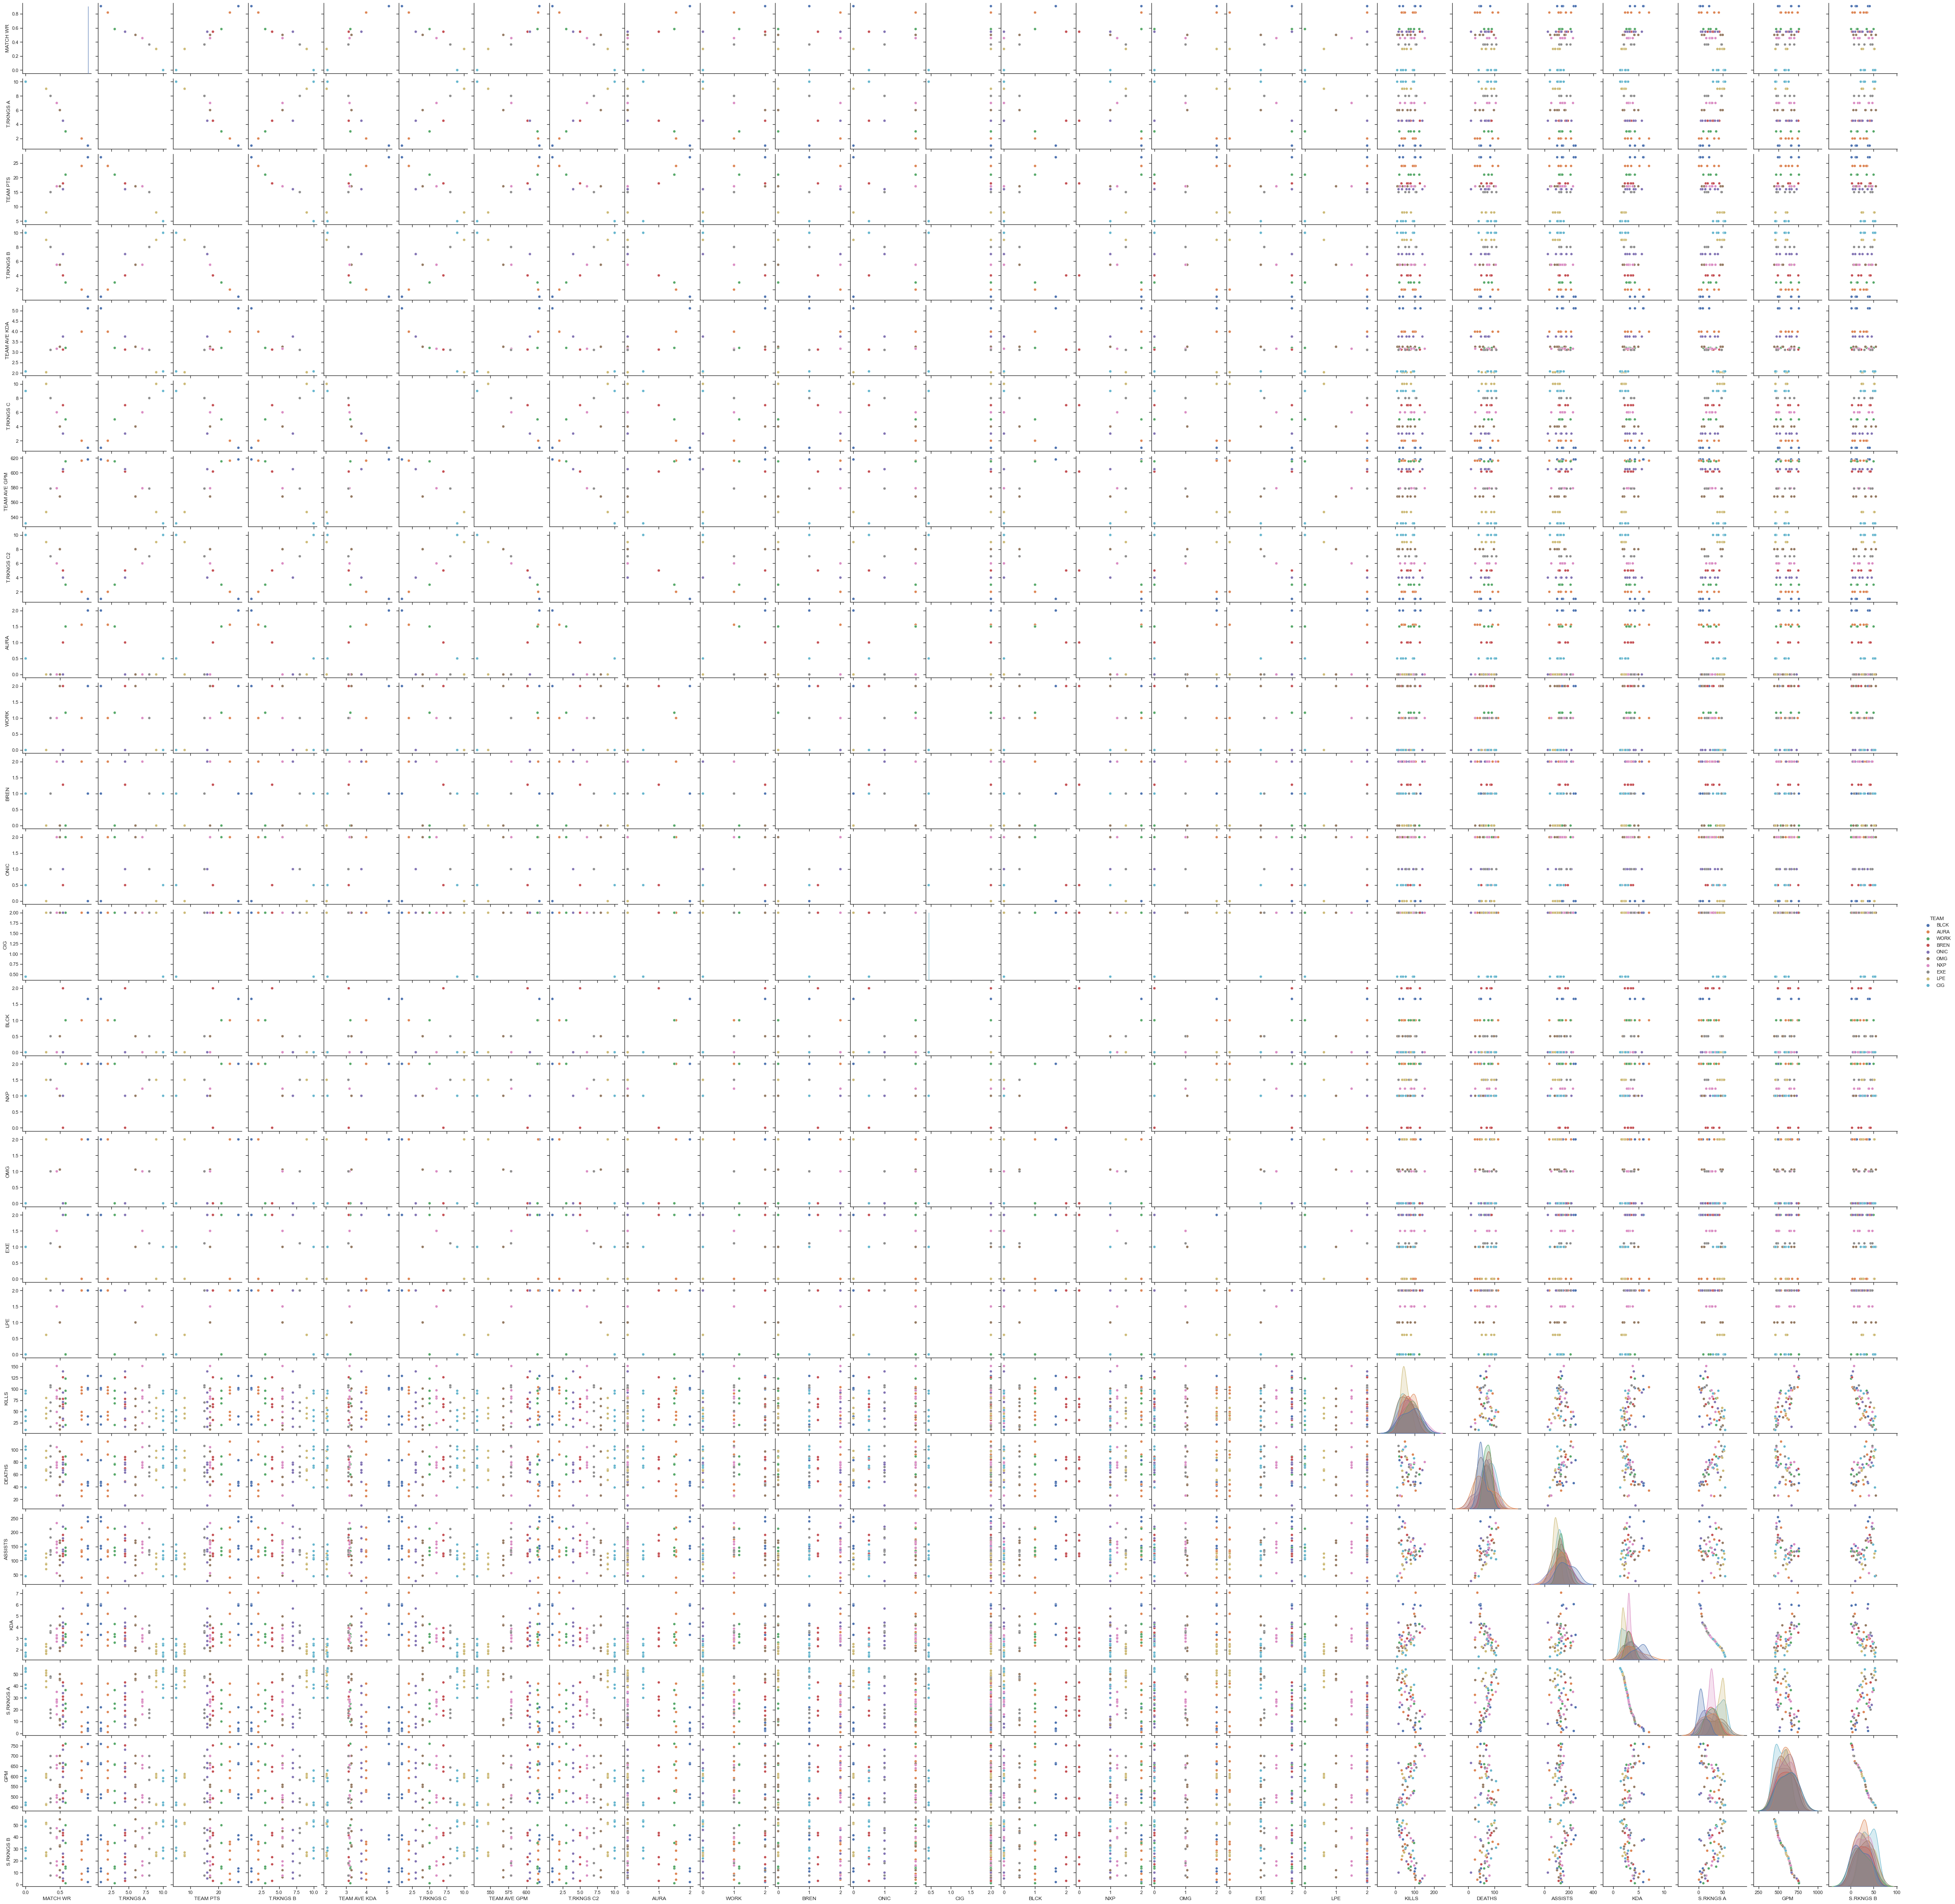

In [7]:
import seaborn as sns
sns.set(style="ticks")

df = df_UPCAT[['TEAM', 'MATCH WR', 'T.RKNGS A', 'TEAM PTS', 'T.RKNGS B',
       'TEAM AVE KDA', 'T.RKNGS C', 'TEAM AVE GPM', 'T.RKNGS C2', 'AURA',
       'WORK', 'BREN', 'ONIC', 'CIG', 'BLCK', 'NXP', 'OMG', 'EXE', 'LPE',
       'KILLS', 'DEATHS', 'ASSISTS', 'KDA', 'S.RKNGS A', 'GPM', 'S.RKNGS B']]
sns.pairplot(df, hue="TEAM", diag_kind='kde')

pass

In [8]:
num=(df_UPCAT.groupby('TEAM').size()/df_UPCAT.groupby('TEAM').size().sum())**2
#print("Population per class: {}\n".format(df_state))
print("Proportion Chance Criterion = {}%".format(100*num.sum()))
print("1.25*Proportion Chance Criterion = {}%".format(1.25*100*num.sum()))

Proportion Chance Criterion = 10.082644628099173%
1.25*Proportion Chance Criterion = 12.603305785123966%


# Step 1: Look at the missing values

In [9]:
df_UPCAT.isnull().sum()

TEAM            0
MATCH WR        0
T.RKNGS A       0
TEAM PTS        0
T.RKNGS B       0
TEAM AVE KDA    0
T.RKNGS C       0
TEAM AVE GPM    0
T.RKNGS C2      0
AURA            0
WORK            0
BREN            0
ONIC            0
CIG             0
BLCK            0
NXP             0
OMG             0
EXE             0
LPE             0
KILLS           0
DEATHS          0
ASSISTS         0
KDA             0
S.RKNGS A       0
GPM             0
S.RKNGS B       0
dtype: int64

# Steps 2 and 3. Remove or Imput the missing values

In [10]:
import pandas as pd
import numpy as np

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)



X_transition = pd.DataFrame(df_UPCAT)
X_clean = DataFrameImputer().fit_transform(X_transition)

X_clean.isnull().sum()

TEAM            0
MATCH WR        0
T.RKNGS A       0
TEAM PTS        0
T.RKNGS B       0
TEAM AVE KDA    0
T.RKNGS C       0
TEAM AVE GPM    0
T.RKNGS C2      0
AURA            0
WORK            0
BREN            0
ONIC            0
CIG             0
BLCK            0
NXP             0
OMG             0
EXE             0
LPE             0
KILLS           0
DEATHS          0
ASSISTS         0
KDA             0
S.RKNGS A       0
GPM             0
S.RKNGS B       0
dtype: int64

In [11]:
X_clean.head()

,TEAM,MATCH WR,T.RKNGS A,TEAM PTS,T.RKNGS B,TEAM AVE KDA,T.RKNGS C,TEAM AVE GPM,T.RKNGS C2,AURA,...,OMG,EXE,LPE,KILLS,DEATHS,ASSISTS,KDA,S.RKNGS A,GPM,S.RKNGS B
0,BLCK,0.909091,1.0,27,1.0,5.106,1,618.0,1,2.0,...,2.0,2.0,2.0,39,46,239,6.04,2.0,512,38.0
1,BLCK,0.909091,1.0,27,1.0,5.106,1,618.0,1,2.0,...,2.0,2.0,2.0,99,42,152,5.98,3.0,665,11.0
2,BLCK,0.909091,1.0,27,1.0,5.106,1,618.0,1,2.0,...,2.0,2.0,2.0,129,46,143,5.91,4.0,759,2.0
3,BLCK,0.909091,1.0,27,1.0,5.106,1,618.0,1,2.0,...,2.0,2.0,2.0,102,48,104,4.29,9.0,660,13.5
4,BLCK,0.909091,1.0,27,1.0,5.106,1,618.0,1,2.0,...,2.0,2.0,2.0,21,83,254,3.31,22.0,494,41.5


In [12]:
X_clean = X_clean.drop('TEAM', axis=1)

# Step 4. Handle Categorical Data, for simplicity let's just One Hat Encode all the categorical values

None, all data are numerical.

# Step 5: Apply Scaler

In [13]:
X_column_names =X_clean.columns

In [14]:
from sklearn.preprocessing import MinMaxScaler
sscaler = MinMaxScaler()
XX = sscaler.fit_transform(X_clean.astype(np.float64)) #You will loss the column names

In [15]:
XX_df = pd.DataFrame(data = XX,columns = X_column_names) # Return the column names
XX_df.head()

,MATCH WR,T.RKNGS A,TEAM PTS,T.RKNGS B,TEAM AVE KDA,T.RKNGS C,TEAM AVE GPM,T.RKNGS C2,AURA,WORK,...,OMG,EXE,LPE,KILLS,DEATHS,ASSISTS,KDA,S.RKNGS A,GPM,S.RKNGS B
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.211268,0.349515,0.933628,0.820423,0.018519,0.207668,0.685185
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.633803,0.310680,0.548673,0.809859,0.037037,0.696486,0.185185
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.845070,0.349515,0.508850,0.797535,0.055556,0.996805,0.018519
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.654930,0.368932,0.336283,0.512324,0.148148,0.680511,0.231481
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.084507,0.708738,1.000000,0.339789,0.388889,0.150160,0.750000


# Step 6:  Now let's run an automated Machine Learning to the above processed data

Below we combine the notebook codes previously shared into a single running code to create an **Automated ML**

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

Number_trials=20

def train_knn(X, y):
    score_train = []
    score_test = []

    for seed in range(Number_trials):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        neighbors_settings = range(1,70)
        acc_train = []
        acc_test = []

        for n_neighbors in neighbors_settings:   
            clf = KNeighborsClassifier(n_neighbors=n_neighbors) # build the model 
            clf.fit(X_train, y_train)    
            acc_train.append(clf.score(X_train, y_train))
            acc_test.append(clf.score(X_test, y_test))

        score_train.append(acc_train)
        score_test.append(acc_test)   
        
    score = np.mean(score_test, axis=0)
    run_time = (time.time() - start_time)
    return ['kNN', np.amax(score), 'N_Neighbor = {0}'.format(np.argmax(score)+1), 'NA',run_time]

def train_logistic(X, y, reg):
    C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]
    #C = [.01, .1]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for alpha_run in C:
            if reg == 'l1':
                lr = LogisticRegression(C=alpha_run, penalty=reg, solver='liblinear').fit(X_train, y_train)
            if reg == 'l2':
                lr = LogisticRegression(C=alpha_run, penalty=reg, dual=False).fit(X_train, y_train)
            
            
            training_accuracy.append(lr.score(X_train, y_train))
            test_accuracy.append(lr.score(X_test, y_test))
            coefs=lr.coef_ 
            weighted_coefs.append(coefs) #append all the computed coefficients per trial
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
    
    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials 
    #print(mean_coefs) 
    score = np.mean(score_test, axis=0)
    
    #Plot the weight of the parameters 
    top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs[0,:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(3,7))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
     
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['Logistic ({0})'.format(reg), np.amax(score), \
            'C = {0}'.format(C[np.argmax(score)]), top_predictor, run_time]

def train_svm(X, y, reg):
    C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]
    #C = [.01, .1]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for alpha_run in C:
            if reg == 'l1':
                svc = LinearSVC(C=alpha_run, penalty=reg, loss='squared_hinge', dual=False).fit(X_train, y_train)
            if reg == 'l2':
                svc = LinearSVC(C=alpha_run, penalty=reg).fit(X_train, y_train)
            training_accuracy.append(svc.score(X_train, y_train))
            test_accuracy.append(svc.score(X_test, y_test))
           # if alpha_run == 0.01:
            coefs = svc.coef_
            weighted_coefs.append(coefs)
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
 

    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)
    

    top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs[0,:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(3,7))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['Linear SVM ({0})'.format(reg), np.amax(score), \
            'C = {0}'.format(C[np.argmax(score)]), top_predictor,run_time]

def train_RF(X, y, reg):
    max_features_tuning=[0.1, .2, .3, .4, .5, .7, .8]
    #C = [.01, .1]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for max_features_run in max_features_tuning:
            svc = RandomForestClassifier(n_estimators=100, max_features=max_features_run).fit(X_train, y_train)
            training_accuracy.append(svc.score(X_train, y_train))
            test_accuracy.append(svc.score(X_test, y_test))
           # if alpha_run == 0.01:
            coefs = svc.feature_importances_
            weighted_coefs.append(coefs)
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
 

    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)
    

    top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs[:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(3,7))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['Random Forest', np.amax(score), \
            'Max_features = {0}'.format(max_features_tuning[np.argmax(score)]), top_predictor,run_time]

def train_GBM(X, y, reg):
    max_features_tuning=[0.1, .2, .3, .4, .5, .7, .8]
    #C = [.01, .1]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for max_features_run in max_features_tuning:
            svc = GradientBoostingClassifier(n_estimators=100,max_depth=3, max_features=max_features_run).fit(X_train, y_train)
            training_accuracy.append(svc.score(X_train, y_train))
            test_accuracy.append(svc.score(X_test, y_test))
           # if alpha_run == 0.01:
            coefs = svc.feature_importances_
            weighted_coefs.append(coefs)
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
 

    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)
    

    top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs[:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(3,7))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['Gradient Boosting Method', np.amax(score), \
            'Max_features = {0}'.format(max_features_tuning[np.argmax(score)]), top_predictor,run_time]



['Random Forest', 1.0, 'Max_features = 0.1', 'T.RKNGS C', 22.806493997573853]
22.806493997573853 seconds
['Gradient Boosting Method', 1.0, 'Max_features = 0.1', 'TEAM AVE KDA', 84.8869161605835]
22.806493997573853 seconds


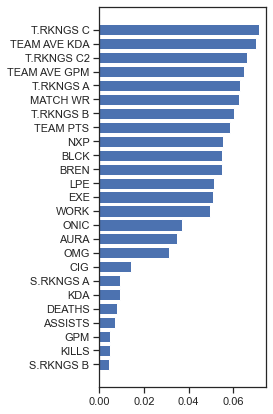

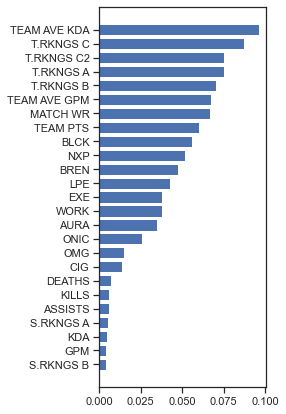

In [20]:
X = XX_df

y = df_UPCAT['TEAM']

import time

start_time = time.time()
f = train_RF(X,y,reg='none')
print(f)
print("%s seconds" % f[4])

start_time = time.time()
g = train_GBM(X,y,reg='none')
print(g)
print("%s seconds" % f[4])



In [18]:
cols = ['Machine Learning Method', 'Test Accuracy', 'Best Parameter', 'Top Predictor Variable', 'Run Time']
df2 = pd.DataFrame(columns=cols)

df2.loc[0] = f
df2.loc[1] = g

df2

NameError: name 'a' is not defined

# Step 7: How to save the weights 

Many ways to save it, you can use **joblib** (you can also use **cPickle**, **dill**)

### Step 1: Load Data

In [ ]:
from sklearn.model_selection import train_test_split

X = XX_df
y = df_UPCAT['fetal_health']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Step 2: Train a given ML model (here we are using Random Forest)

In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_features=0.4)
rf.fit(X_train, y_train)

# save
joblib.dump(rf, "fetal_health.joblib")

### Step 3: Access the weight without retraining again, Step 2 can be skipped after the first run

In [ ]:
import joblib

# load
loaded_rf = joblib.load("fetal_health.joblib")
loaded_rf.predict(X_test)

In [ ]:
loaded_rf.score(X_test, y_test)